<a href="https://colab.research.google.com/github/Mamatha121993/Amazon_sales_Analysis_over_india/blob/main/Data_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data='https://github.com/Mamatha121993/Data_Task_2/raw/main/SA%20-%20Data%20for%20Task%202.xlsx'
df=pd.read_excel(data)
df.head()

Primary Key   Order No  Segment Number Order Date Manufacturer Model  \
0  SO0005588-1  SO0005588               1 2022-04-30       PASEIH  6780   
1  SO0005907-1  SO0005907               1 2022-04-30       PASEIH  6780   
2  SO0006100-1  SO0006100               1 2022-04-30       PASEIH  6780   
3  SO0006642-1  SO0006642               1 2022-04-30       PASEIH  6780   
4  SO0018457-1  SO0018457               1 2022-04-30       PASEIH  6780   

  Product Category  Model Year Serial Number  Meter 1 Reading  \
0             APPL           0     YFT042399        2531.0999   
1             APPL           0     YFT042399        2531.0999   
2             APPL           0     YFT042399        2531.0999   
3             APPL           0     YFT042399        2531.0999   
4             APPL           0     YFT042399        2531.0999   

                                           Complaint Cause  \
0  No cab heat, temp gauge dont get to operating ...   NaN   
1  No cab heat, temp gauge dont get to operating ...   NaN   
2  No cab heat, temp gauge dont get to operating ...   NaN   
3  No cab heat, temp gauge dont get to operating ...   NaN   
4  No cab heat, temp gauge dont get to operating ...   NaN   

                                          Correction  \
0  Als ich das Gerät in die Werkstatt fuhr, stieg...   
1  Als ich das Gerät in die Werkstatt fuhr, stieg...   
2  Als ich das Gerät in die Werkstatt fuhr, stieg...   
3  Als ich das Gerät in die Werkstatt fuhr, stieg...   
4  Als ich das Gerät in die Werkstatt fuhr, stieg...   

  Failure Condition - Failure Component  \
0  No Heat - Cab, Not Achieving - Gauge   
1  No Heat - Cab, Not Achieving - Gauge   
2             Not Charging - Alternator   
3                          Faulty - Fan   
4              Oil Loss - Not Mentioned   

                      Fix Condition - Fix Component  
0                    No Component Mentioned - Added  
1                    No Component Mentioned - Added  
2   No Component Mentioned - No Component Mentioned  
3  Tensioner - Removed, Crankshaft Pulley - Cleaned  
4   No Component Mentioned - No Component Mentioned

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Primary Key                            500 non-null    object        
 1   Order No                               500 non-null    object        
 2   Segment Number                         500 non-null    int64         
 3   Order Date                             500 non-null    datetime64[ns]
 4   Manufacturer                           500 non-null    object        
 5   Model                                  500 non-null    object        
 6   Product Category                       500 non-null    object        
 7   Model Year                             500 non-null    int64         
 8   Serial Number                          500 non-null    object        
 9   Meter 1 Reading                        500 non-null    float64   

In [4]:
df.describe()


Segment Number                     Order Date   Model Year  \
count      500.000000                            500   500.000000   
mean         3.528000  2023-08-22 01:35:02.400000256  1173.146000   
min          1.000000            2022-04-30 00:00:00     0.000000   
25%          1.000000            2023-05-31 00:00:00     0.000000   
50%          2.000000            2023-08-24 00:00:00  2022.000000   
75%          5.000000            2024-02-15 00:00:00  2023.000000   
max         19.000000            2024-02-19 00:00:00  2024.000000   
std          3.359134                            NaN   999.303954   

       Meter 1 Reading  
count       500.000000  
mean        793.693096  
min           0.000000  
25%           0.000000  
50%         119.000000  
75%        1275.000000  
max        6958.000000  
std        1291.951903

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

Primary Key                                0
Order No                                   0
Segment Number                             0
Order Date                                 0
Manufacturer                               0
Model                                      0
Product Category                           0
Model Year                                 0
Serial Number                              0
Meter 1 Reading                            0
Complaint                                  0
Cause                                    294
Correction                                25
Failure Condition - Failure Component      0
Fix Condition - Fix Component              0
dtype: int64

In [7]:
for col in df.columns:
    print(col,df[col].unique())

Primary Key ['SO0005588-1' 'SO0005907-1' 'SO0006100-1' 'SO0006642-1' 'SO0018457-1'
 'SO0018457-2' 'SO0018596-10' 'SO0018596-11' 'SO0018596-12' 'SO0018596-13'
 'SO0018596-3' 'SO0018596-4' 'SO0018596-5' 'SO0018596-6' 'SO0020073-1'
 'SO0020073-2' 'SO0020073-6' 'SO0020073-7' 'SO0020529-2' 'SO0022590-3'
 'SO0023561-1' 'SO0023561-3' 'SO0023561-4' 'SO0024239-1' 'SO0024239-2'
 'SO0024239-4' 'SO0024736-7' 'SO0024736-8' 'SO0024736-9' 'SO0024816-1'
 'SO0024816-15' 'SO0024816-16' 'SO0024816-17' 'SO0024816-19' 'SO0024816-2'
 'SO0024816-3' 'SO0024905-2' 'SO0025176-1' 'SO0025176-2' 'SO0025403-1'
 'SO0025623-3' 'SO0025623-4' 'SO0026296-1' 'SO0026385-1' 'SO0026385-11'
 'SO0026385-4' 'SO0027106-1' 'SO0027642-2' 'SO0027642-3' 'SO0028255-1'
 'SO0028352-1' 'SO0028770-1' 'SO0029596-1' 'SO0029596-2' 'SO0029735-1'
 'SO0031018-6' 'SO0031018-7' 'SO0031018-8' 'SO0031018-9' 'SO0031765-1'
 'SO0032650-1' 'SO0033441-1' 'SO0033576-1' 'SO0033576-2' 'SO0033576-3'
 'SO0034013-1' 'SO0034287-2' 'SO0034550-1' 'SO0036578-2'

#Handle null values:
# Format Correction- Consistent data types across datase

In [8]:
df['Cause'] = df['Cause'].fillna('No issue reported')

In [9]:
df.isnull().sum()

Primary Key                               0
Order No                                  0
Segment Number                            0
Order Date                                0
Manufacturer                              0
Model                                     0
Product Category                          0
Model Year                                0
Serial Number                             0
Meter 1 Reading                           0
Complaint                                 0
Cause                                     0
Correction                               25
Failure Condition - Failure Component     0
Fix Condition - Fix Component             0
dtype: int64

In [10]:
df['Correction'].mode()

0    Begonnen habe ich mit dem Abziehen der Motorha...
1    Das Ölleck an der Armatur der Zahnradpumpe war...
Name: Correction, dtype: object

In [11]:
#fill this column with mode
df['Correction']=df['Correction'].fillna('No correction')

In [12]:
df.isnull().sum()

Primary Key                              0
Order No                                 0
Segment Number                           0
Order Date                               0
Manufacturer                             0
Model                                    0
Product Category                         0
Model Year                               0
Serial Number                            0
Meter 1 Reading                          0
Complaint                                0
Cause                                    0
Correction                               0
Failure Condition - Failure Component    0
Fix Condition - Fix Component            0
dtype: int64

#Handled Model_year feature replace 0 to 2022 by using median

In [13]:
df['Model Year'].unique()

array([   0, 2020, 2023, 2024, 2022, 2019, 2021])

In [14]:
df['Model Year'].median()

2022.0

In [15]:
#replace 0 to 2022
df['Model Year']=df['Model Year'].replace(0,2022)

In [16]:
df['Model Year'].unique()

array([2022, 2020, 2023, 2024, 2019, 2021])

#Summary of Cleaning Actions Taken in Notebook

- 1.Inspected duplicates (though not explicitly removed).

- 2.Checked for missing values multiple times.

- 3.Replaced missing values in Cause with "No issue reported".

- 4.Replaced missing values in Correction with "No correction".

- 5.Corrected invalid year values (0 → 2022) in Model Year.

<Axes: >

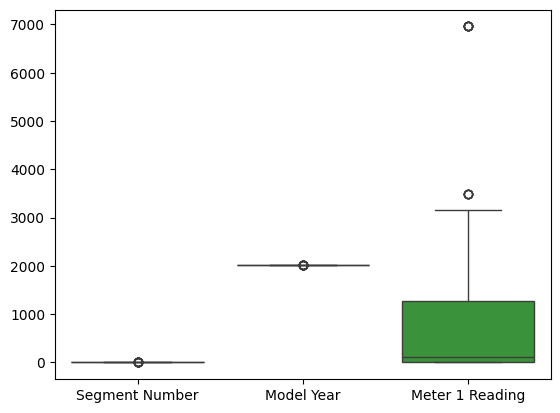

In [17]:
sns.boxplot(df)

In [19]:
col=['Segment Number','Model Year','Meter 1 Reading']

In [20]:
#fill outliers:
for i in col:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    upper=Q3+1.5*IQR
    lower=Q1-1.5*IQR
    df[i]=np.where(df[i]>upper,upper,df[i])
    df[i]=np.where(df[i]<lower,lower,df[i])






<Axes: >

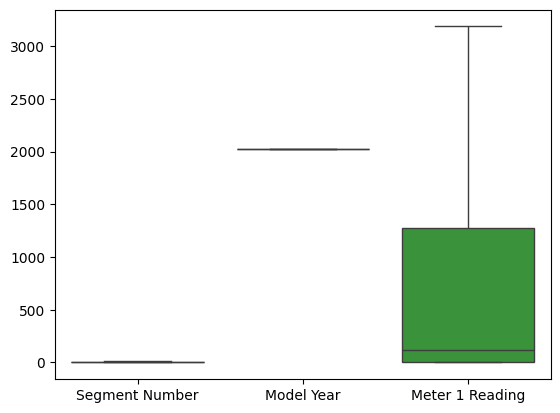

In [21]:
sns.boxplot(df)

#Removed Ourliers:

#Data_set_2:

In [23]:
link='https://raw.githubusercontent.com/Mamatha121993/Data-for-Task-1/main/Cleaned_Tagged_data_task%201.csv'
df1=pd.read_csv(link)
df1.head()

VIN  TRANSACTION_ID  \
0  3HCFDDE89SH220903        13041.25   
1  1HRFFEE8XSZ230636        13028.00   
2  1HYKSMRK6SZ000990        13035.00   
3  3HCFDFEL3SH241701        13041.25   
4  1HRFFHEL1RZ181474        13041.25   

                                 CORRECTION_VERBATIM  \
0                            Replaced Steering Wheel   
1  Technician Found The Steering Column Plastic T...   
2  Accessed, Removed And Replaced The Drivers Ass...   
3  Diagnosis Of Open Circuit Inside Wheel. Replac...   
4  Accessed, Removed And Replaced The Drivers Ass...   

                                   CUSTOMER_VERBATIM REPAIR_DATE  \
0         Customer States Heated Steering Wheel Inop  02-01-2024   
1                         Heated Steering Wheel Inop  03-01-2024   
2         Customer States Heated Steering Wheel Inop  04-01-2024   
3         Customer States Heated Steering Wheel Inop  04-01-2024   
4  Owner Reports: The Super Cruise Bar On The Ste...  05-01-2024   

                                  CAUSAL_PART_NM  \
0                          Wheel Asm-Strg *Black   
1     Applique Asm-Strg Whl Tr Spoke Cvr *Vulcan   
2  Applique Asm-Strg Whl Tr Spoke Cvr *Jet Black   
3                          Wheel Asm-Strg *Black   
4                          Wheel Asm-Strg *Black   

              GLOBAL_LABOR_CODE_DESCRIPTION          PLATFORM      BODY_STYLE  \
0  Heated Steering Wheel Module Replacement  Full Size Trucks    Extended Cab   
1                Steering Wheel Replacement  Full Size Trucks    Extended Cab   
2  Heated Steering Wheel Module Replacement               Bev  4 Door Utility   
3  Heated Steering Wheel Module Replacement  Full Size Trucks    Extended Cab   
4  Heated Steering Wheel Module Replacement  Full Size Trucks    Extended Cab   

    VPPC  ... TRANSMISSION_TRACE_NBR  SRC_TXN_ID SRC_VER_NBR TRANSACTION_CNTR  \
0  T1Ccf  ...       S2210121Cnjx0941  2820879995           6                1   
1  T1Cgf  ...       R2210881Cnjx0287  2820879995           6                1   
2   L233  ...       21210129Ikbp0429  2809979441           4                1   
3  T1Ccf  ...       S1210822Ckjx0291  2820879995           6                1   
4  T1Cgf  ...       R2212922Ckjx0928  2820879995           8                1   

  MEDIA_FLAG VIN_MODL_DESGTR LINE_SERIES LAST_KNOWN_DELVRY_TYPE_CD  \
0          N         Cf18543         NaN                      21.0   
1          Y         Tf18543         NaN                      10.0   
2          Y           6Mb26       Lux 1                      10.0   
3          Y         Cf18543         NaN                      10.0   
4          N         Tf18543         NaN                      10.0   

   NON_CAUSAL_PART_QTY SALES_REGION_CODE  
0                    0                 1  
1                    0                 1  
2                    0                 1  
3                    0                 1  
4                    0                 1  

[5 rows x 51 columns]

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   VIN                            100 non-null    object 
 1   TRANSACTION_ID                 100 non-null    float64
 2   CORRECTION_VERBATIM            100 non-null    object 
 3   CUSTOMER_VERBATIM              100 non-null    object 
 4   REPAIR_DATE                    100 non-null    object 
 5   CAUSAL_PART_NM                 100 non-null    object 
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object 
 7   PLATFORM                       100 non-null    object 
 8   BODY_STYLE                     100 non-null    object 
 9   VPPC                           100 non-null    object 
 10  PLANT                          100 non-null    object 
 11  BUILD_COUNTRY                  100 non-null    object 
 12  LAST_KNOWN_DLR_NAME            100 non-null    obje

In [41]:
common_cols = set(df.columns).intersection(set(df1.columns))
print(common_cols)



set()


#Merged Two data set:

In [29]:
merged_df = pd.concat([df, df1], axis=1)
merged_df.head()

Primary Key   Order No  Segment Number Order Date Manufacturer Model  \
0  SO0005588-1  SO0005588             1.0 2022-04-30       PASEIH  6780   
1  SO0005907-1  SO0005907             1.0 2022-04-30       PASEIH  6780   
2  SO0006100-1  SO0006100             1.0 2022-04-30       PASEIH  6780   
3  SO0006642-1  SO0006642             1.0 2022-04-30       PASEIH  6780   
4  SO0018457-1  SO0018457             1.0 2022-04-30       PASEIH  6780   

  Product Category  Model Year Serial Number  Meter 1 Reading  ...  \
0             APPL      2022.0     YFT042399        2531.0999  ...   
1             APPL      2022.0     YFT042399        2531.0999  ...   
2             APPL      2022.0     YFT042399        2531.0999  ...   
3             APPL      2022.0     YFT042399        2531.0999  ...   
4             APPL      2022.0     YFT042399        2531.0999  ...   

  TRANSMISSION_TRACE_NBR    SRC_TXN_ID SRC_VER_NBR TRANSACTION_CNTR  \
0       S2210121Cnjx0941  2.820880e+09         6.0              1.0   
1       R2210881Cnjx0287  2.820880e+09         6.0              1.0   
2       21210129Ikbp0429  2.809979e+09         4.0              1.0   
3       S1210822Ckjx0291  2.820880e+09         6.0              1.0   
4       R2212922Ckjx0928  2.820880e+09         8.0              1.0   

  MEDIA_FLAG VIN_MODL_DESGTR  LINE_SERIES LAST_KNOWN_DELVRY_TYPE_CD  \
0          N         Cf18543          NaN                      21.0   
1          Y         Tf18543          NaN                      10.0   
2          Y           6Mb26        Lux 1                      10.0   
3          Y         Cf18543          NaN                      10.0   
4          N         Tf18543          NaN                      10.0   

  NON_CAUSAL_PART_QTY SALES_REGION_CODE  
0                 0.0               1.0  
1                 0.0               1.0  
2                 0.0               1.0  
3                 0.0               1.0  
4                 0.0               1.0  

[5 rows x 66 columns]

#Note: Can't join both data coz there is no common features from both data set just Concate the two data set

In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 66 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Primary Key                            500 non-null    object        
 1   Order No                               500 non-null    object        
 2   Segment Number                         500 non-null    float64       
 3   Order Date                             500 non-null    datetime64[ns]
 4   Manufacturer                           500 non-null    object        
 5   Model                                  500 non-null    object        
 6   Product Category                       500 non-null    object        
 7   Model Year                             500 non-null    float64       
 8   Serial Number                          500 non-null    object        
 9   Meter 1 Reading                        500 non-null    float64   

#Visualization:

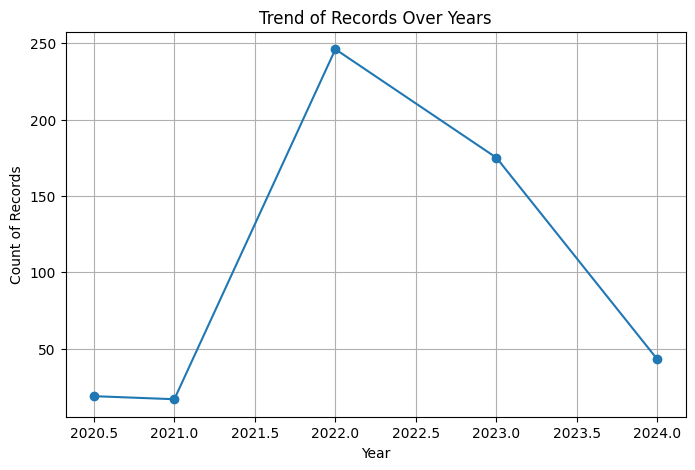

In [31]:
trend = merged_df.groupby("Model Year").size()

plt.figure(figsize=(8,5))
trend.plot(kind="line", marker="o")
plt.title("Trend of Records Over Years")
plt.xlabel("Year")
plt.ylabel("Count of Records")
plt.grid(True)
plt.show()

In [42]:
numeric_columns = merged_df.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()
display(correlation_matrix)


Segment Number  Model Year  Meter 1 Reading  \
Segment Number                   1.000000   -0.018248         0.106865   
Model Year                      -0.018248    1.000000        -0.521521   
Meter 1 Reading                  0.106865   -0.521521         1.000000   
TRANSACTION_ID                   0.105406    0.272911        -0.216328   
DEALER_REGION                    0.146753   -0.002143         0.108624   
REPAIR_AGE                      -0.076908   -0.118458        -0.095332   
KM                               0.051276   -0.010080        -0.074942   
COMPLAINT_CD_CSI                      NaN         NaN              NaN   
ORD_SELLING_SRC_CD               0.065223   -0.039893         0.126071   
GLOBAL_LABOR_CODE               -0.065601   -0.192459         0.018822   
REPORTING_COST                  -0.087265    0.058942        -0.066054   
TOTALCOST                       -0.076956    0.060362        -0.081715   
LBRCOST                         -0.049699    0.021147         0.023573   
TRANSMISSION_SOURCE_PLANT        0.039232   -0.075535        -0.024819   
SRC_TXN_ID                      -0.099304    0.569328        -0.516066   
SRC_VER_NBR                      0.107818    0.038603         0.114820   
TRANSACTION_CNTR                      NaN         NaN              NaN   
LAST_KNOWN_DELVRY_TYPE_CD       -0.011761   -0.091131         0.015939   
NON_CAUSAL_PART_QTY             -0.069515    0.116038        -0.133394   
SALES_REGION_CODE                0.146753   -0.002143         0.108624   

                           TRANSACTION_ID  DEALER_REGION  REPAIR_AGE  \
Segment Number                   0.105406       0.146753   -0.076908   
Model Year                       0.272911      -0.002143   -0.118458   
Meter 1 Reading                 -0.216328       0.108624   -0.095332   
TRANSACTION_ID                   1.000000      -0.101559   -0.098089   
DEALER_REGION                   -0.101559       1.000000    0.032915   
REPAIR_AGE                      -0.098089       0.032915    1.000000   
KM                              -0.070144       0.018366    0.643286   
COMPLAINT_CD_CSI                      NaN            NaN         NaN   
ORD_SELLING_SRC_CD              -0.005893       0.452254    0.131825   
GLOBAL_LABOR_CODE                0.002557      -0.041346   -0.000328   
REPORTING_COST                   0.237871      -0.122769   -0.257771   
TOTALCOST                        0.285325      -0.136533   -0.235559   
LBRCOST                          0.021481      -0.027174    0.057660   
TRANSMISSION_SOURCE_PLANT       -0.180218      -0.094418    0.066761   
SRC_TXN_ID                       0.455466      -0.105558   -0.015595   
SRC_VER_NBR                      0.323229      -0.144798   -0.030509   
TRANSACTION_CNTR                      NaN            NaN         NaN   
LAST_KNOWN_DELVRY_TYPE_CD       -0.146538       0.042096    0.003391   
NON_CAUSAL_PART_QTY              0.210040       0.181506    0.006367   
SALES_REGION_CODE               -0.101559       1.000000    0.032915   

                                 KM  COMPLAINT_CD_CSI  ORD_SELLING_SRC_CD  \
Segment Number             0.051276               NaN            0.065223   
Model Year                -0.010080               NaN           -0.039893   
Meter 1 Reading           -0.074942               NaN            0.126071   
TRANSACTION_ID            -0.070144               NaN           -0.005893   
DEALER_REGION              0.018366               NaN            0.452254   
REPAIR_AGE                 0.643286               NaN            0.131825   
KM                         1.000000               NaN            0.204286   
COMPLAINT_CD_CSI                NaN               NaN                 NaN   
ORD_SELLING_SRC_CD         0.204286               NaN            1.000000   
GLOBAL_LABOR_CODE          0.070802               NaN           -0.091805   
REPORTING_COST            -0.231067               NaN            0.006348   
TOTALCOST                 -0.214754

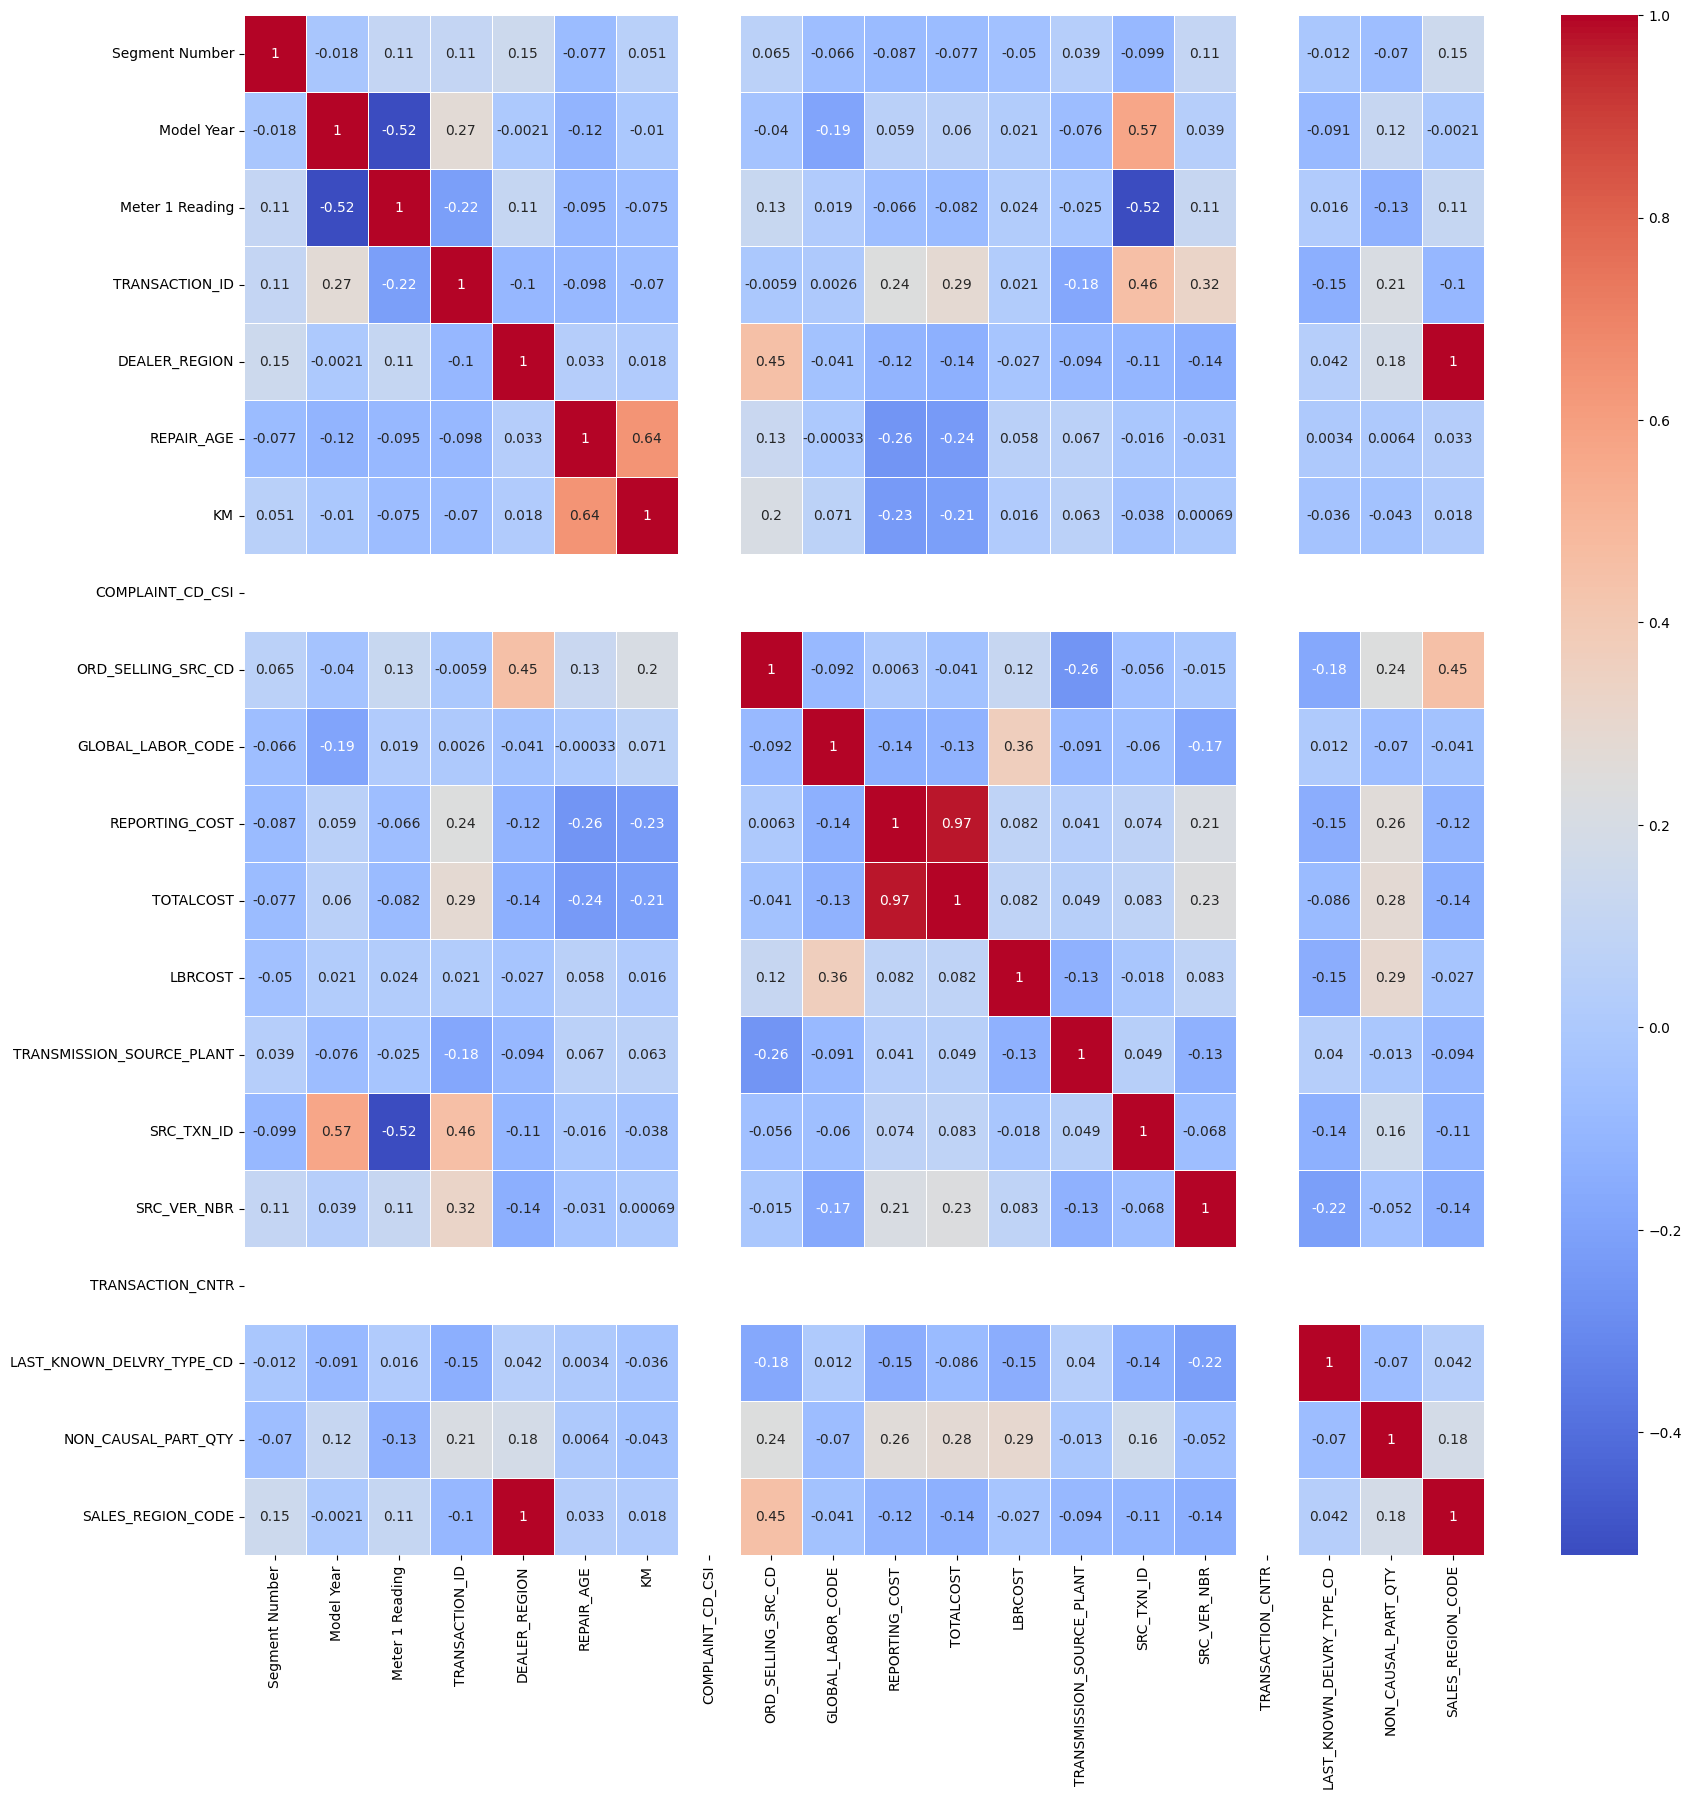

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()

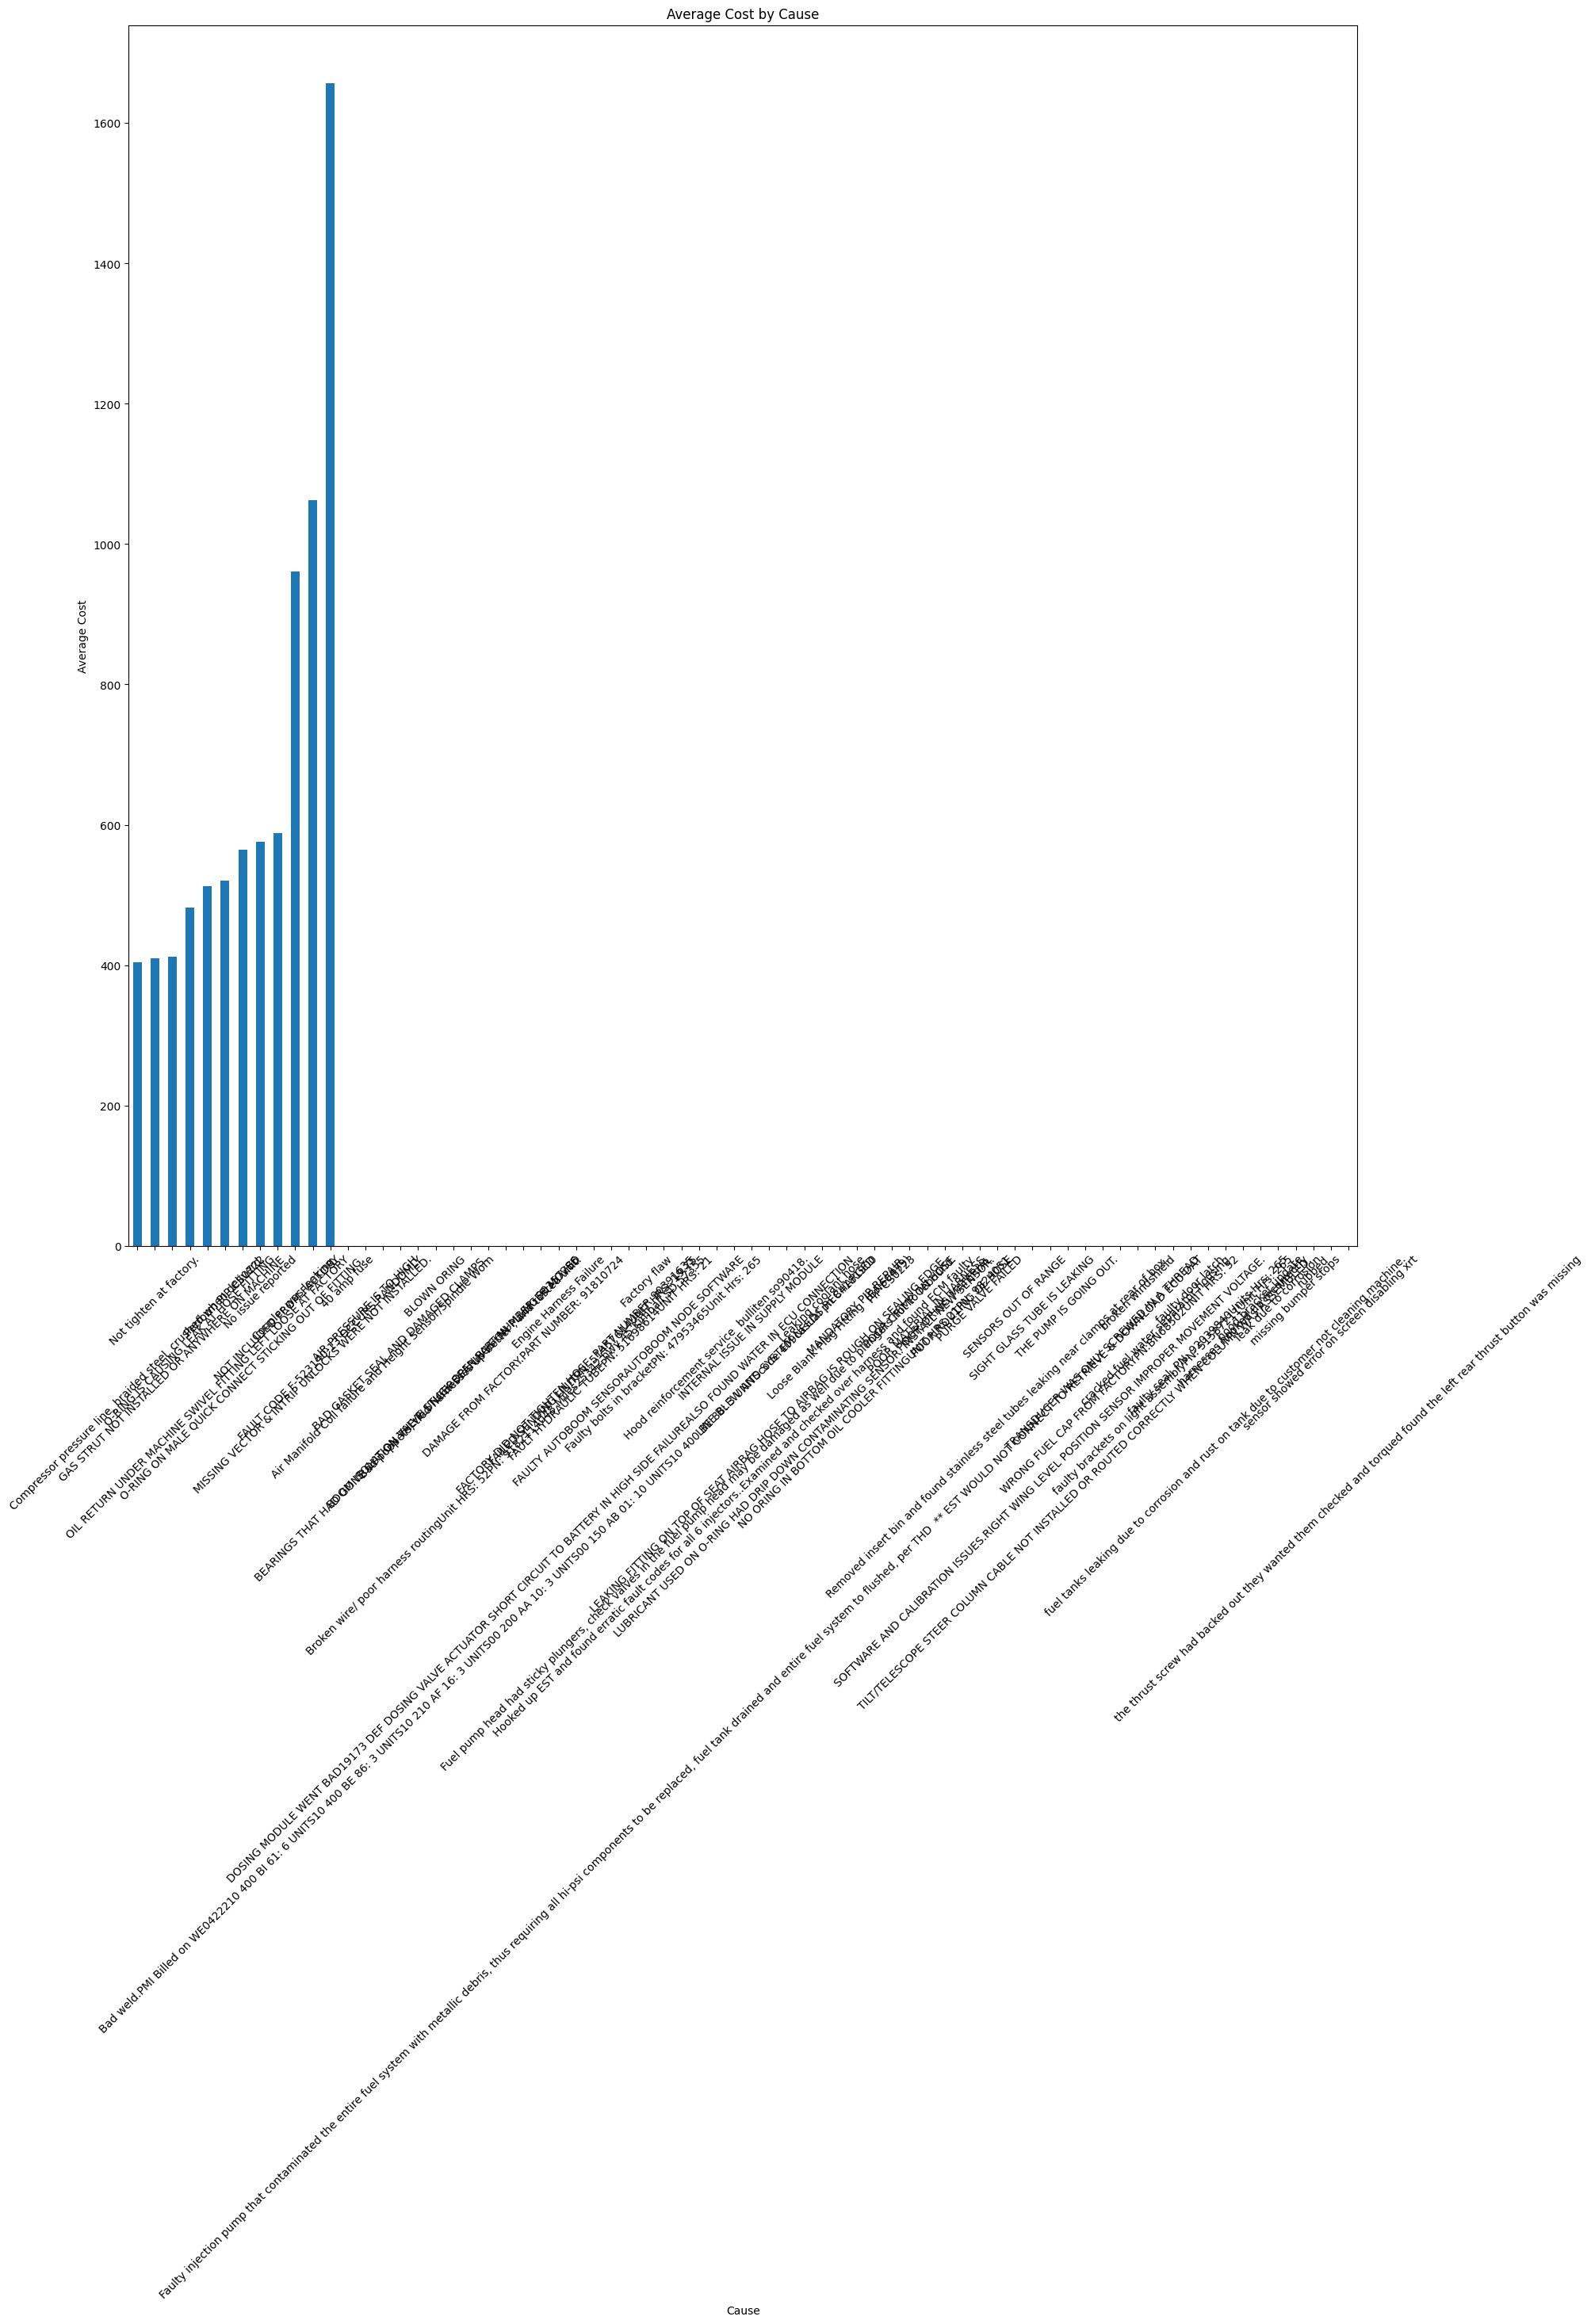

In [49]:
avg_cost = merged_df.groupby("Cause")["TOTALCOST"].mean().sort_values()
plt.figure(figsize=(20,20))
avg_cost.plot(kind="bar")
plt.title("Average Cost by Cause")
plt.xlabel("Cause")
plt.ylabel("Average Cost")
plt.xticks(rotation=45)
plt.show()


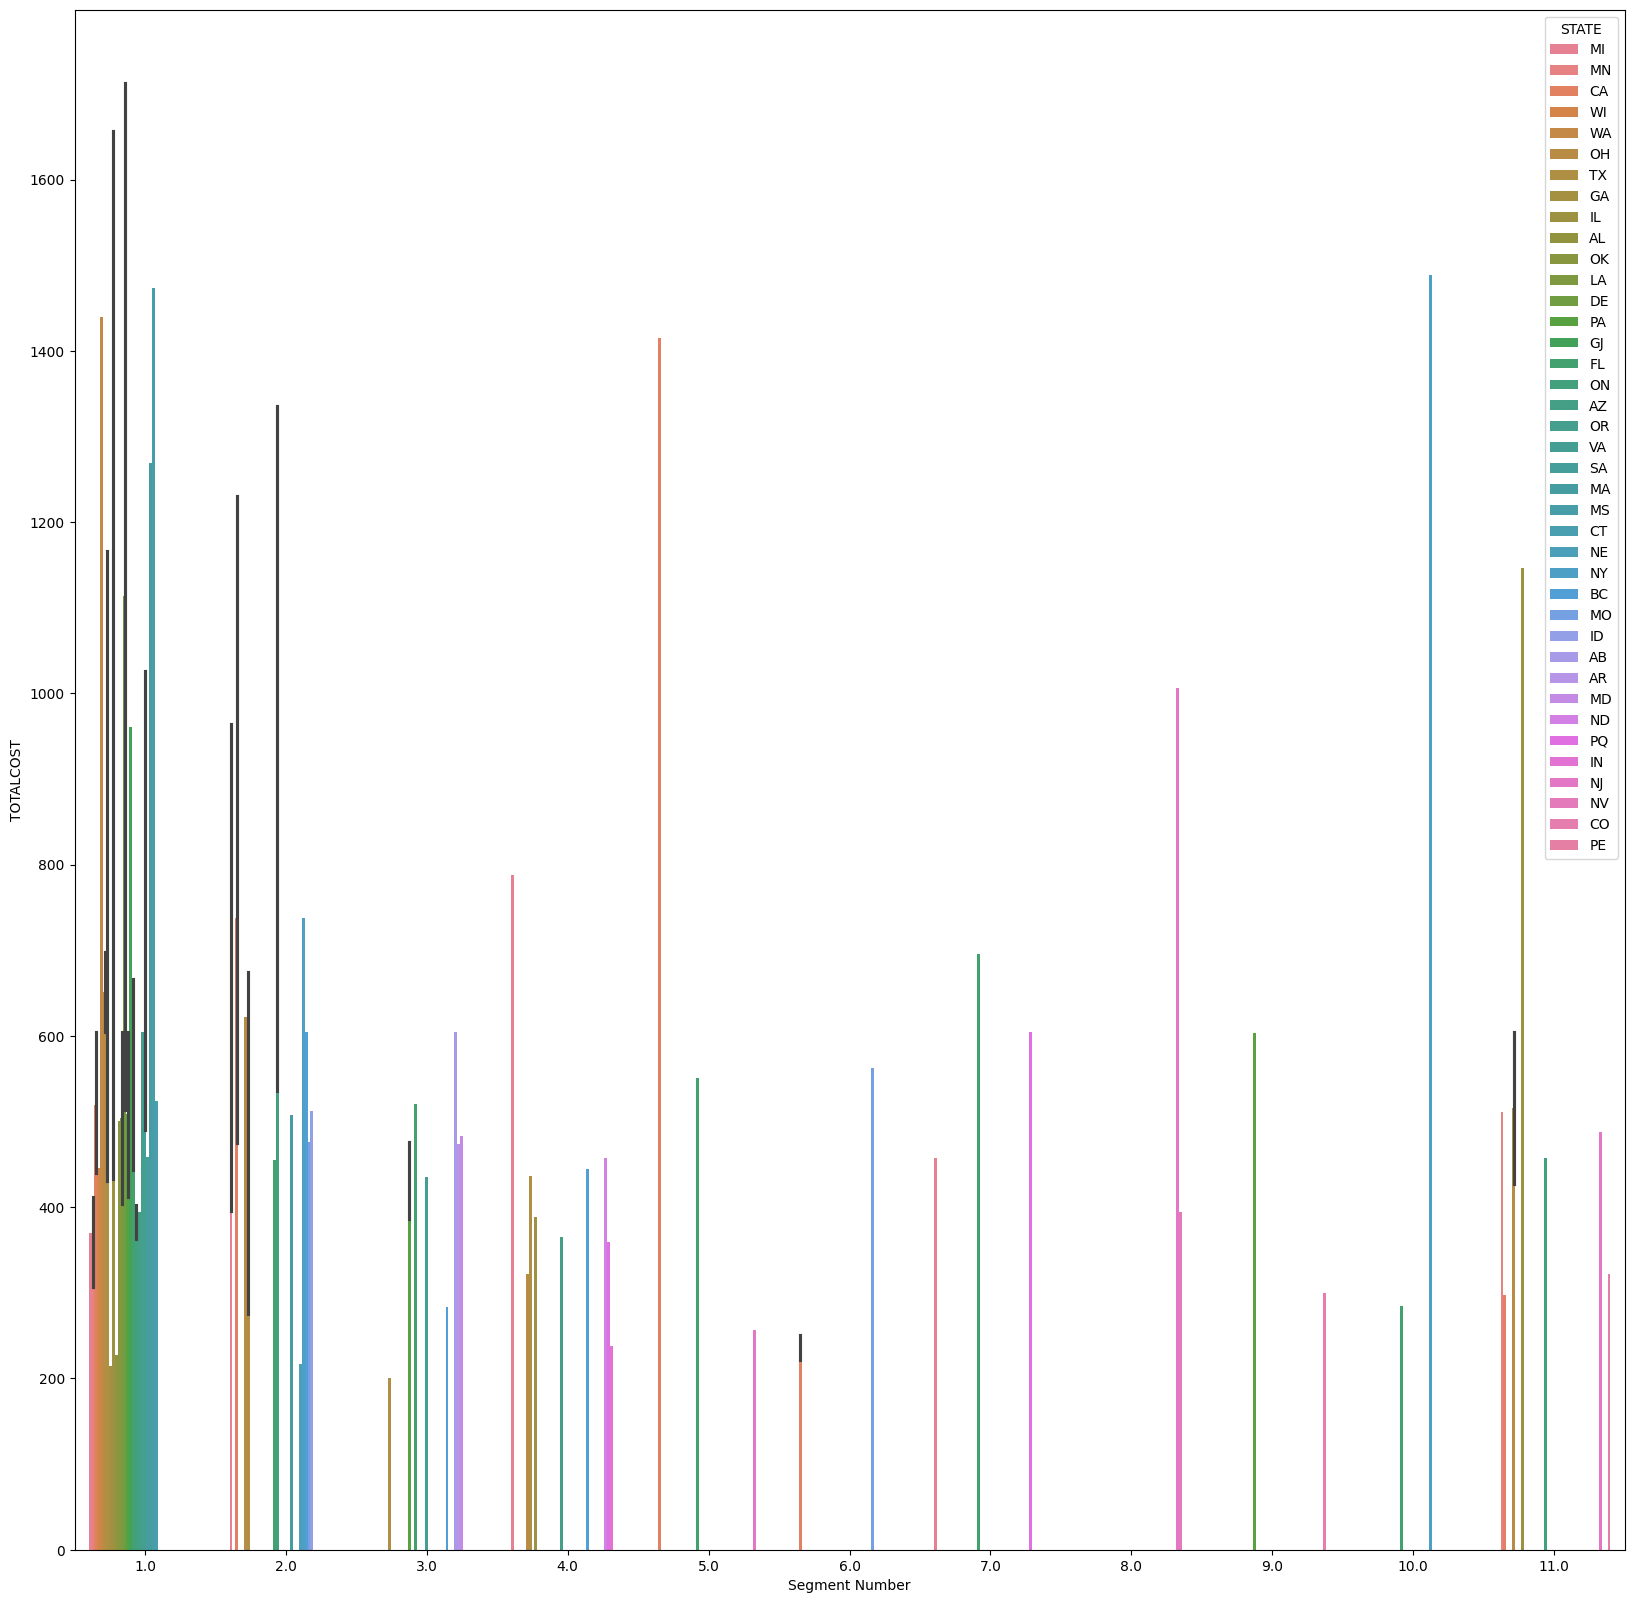

In [54]:
#barplot
plt.figure(figsize=(20,20))
sns.barplot(x='Segment Number',y='TOTALCOST', hue='STATE',data=merged_df)
plt.show()

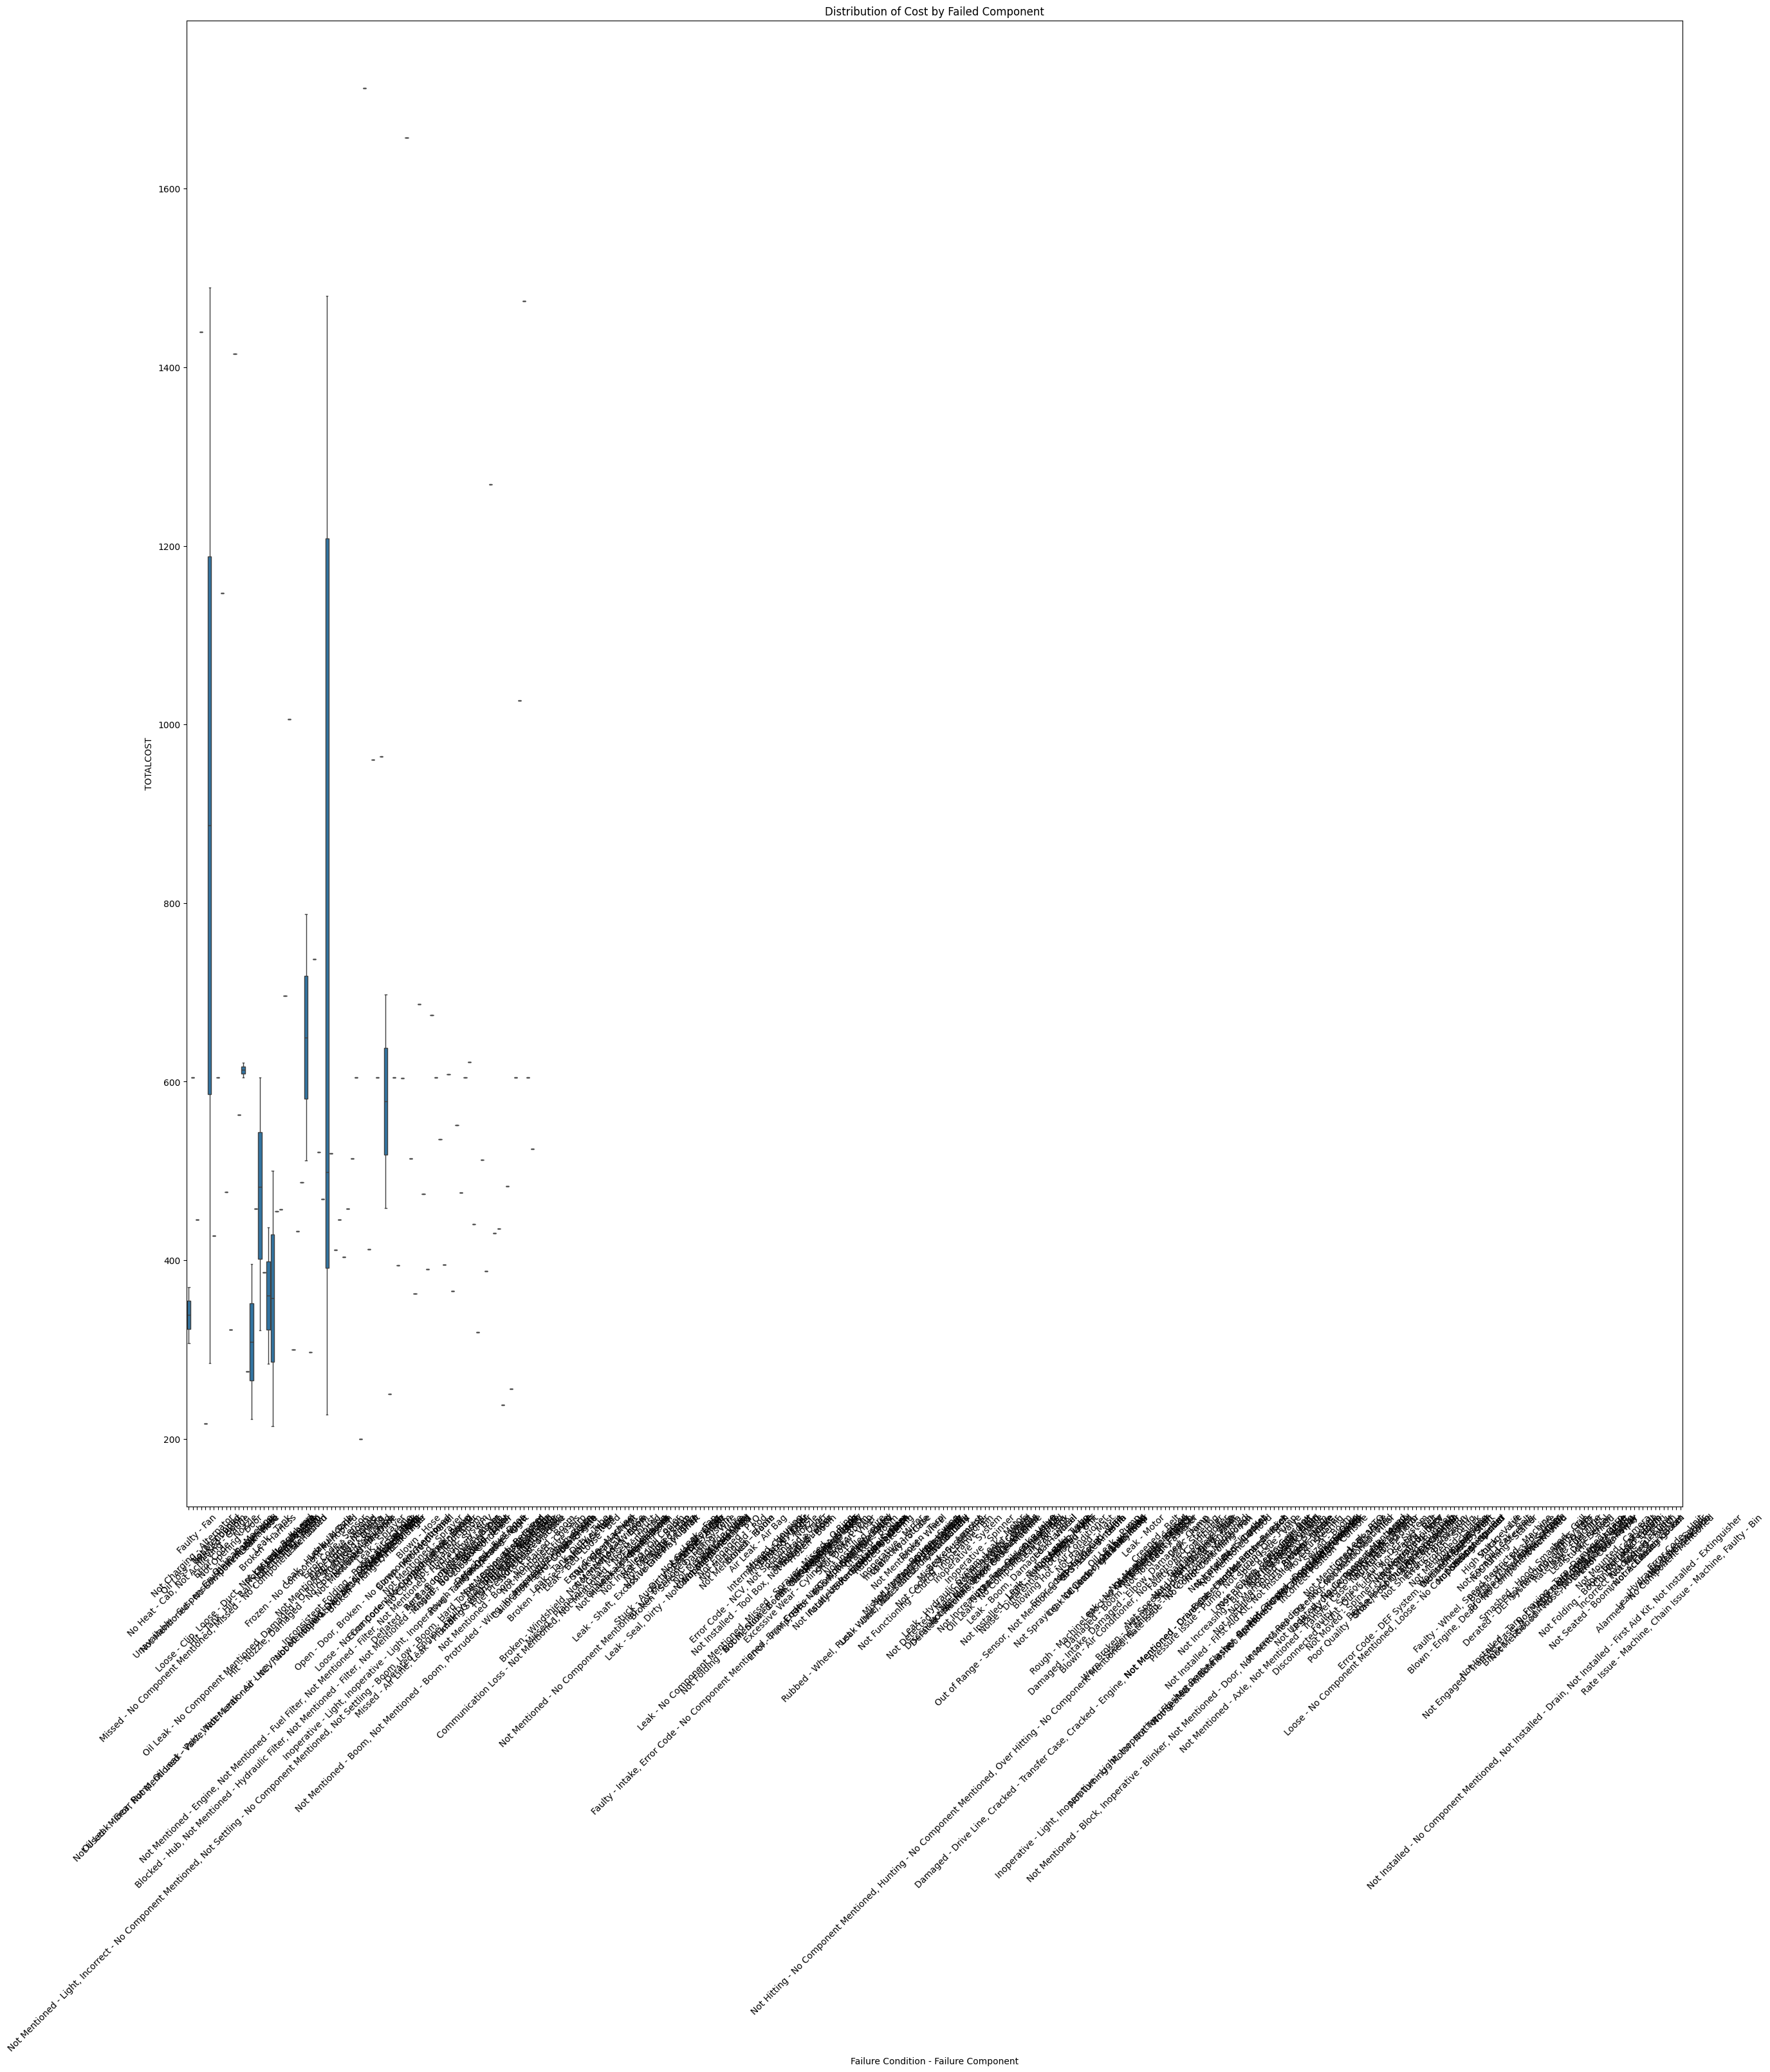

In [57]:
plt.figure(figsize=(30,30))
sns.boxplot(x="Failure Condition - Failure Component", y="TOTALCOST", data=merged_df)
plt.xticks(rotation=45)
plt.title("Distribution of Cost by Failed Component")
plt.show()



<Axes: xlabel='Failure Condition - Failure Component', ylabel='Fix Condition - Fix Component'>

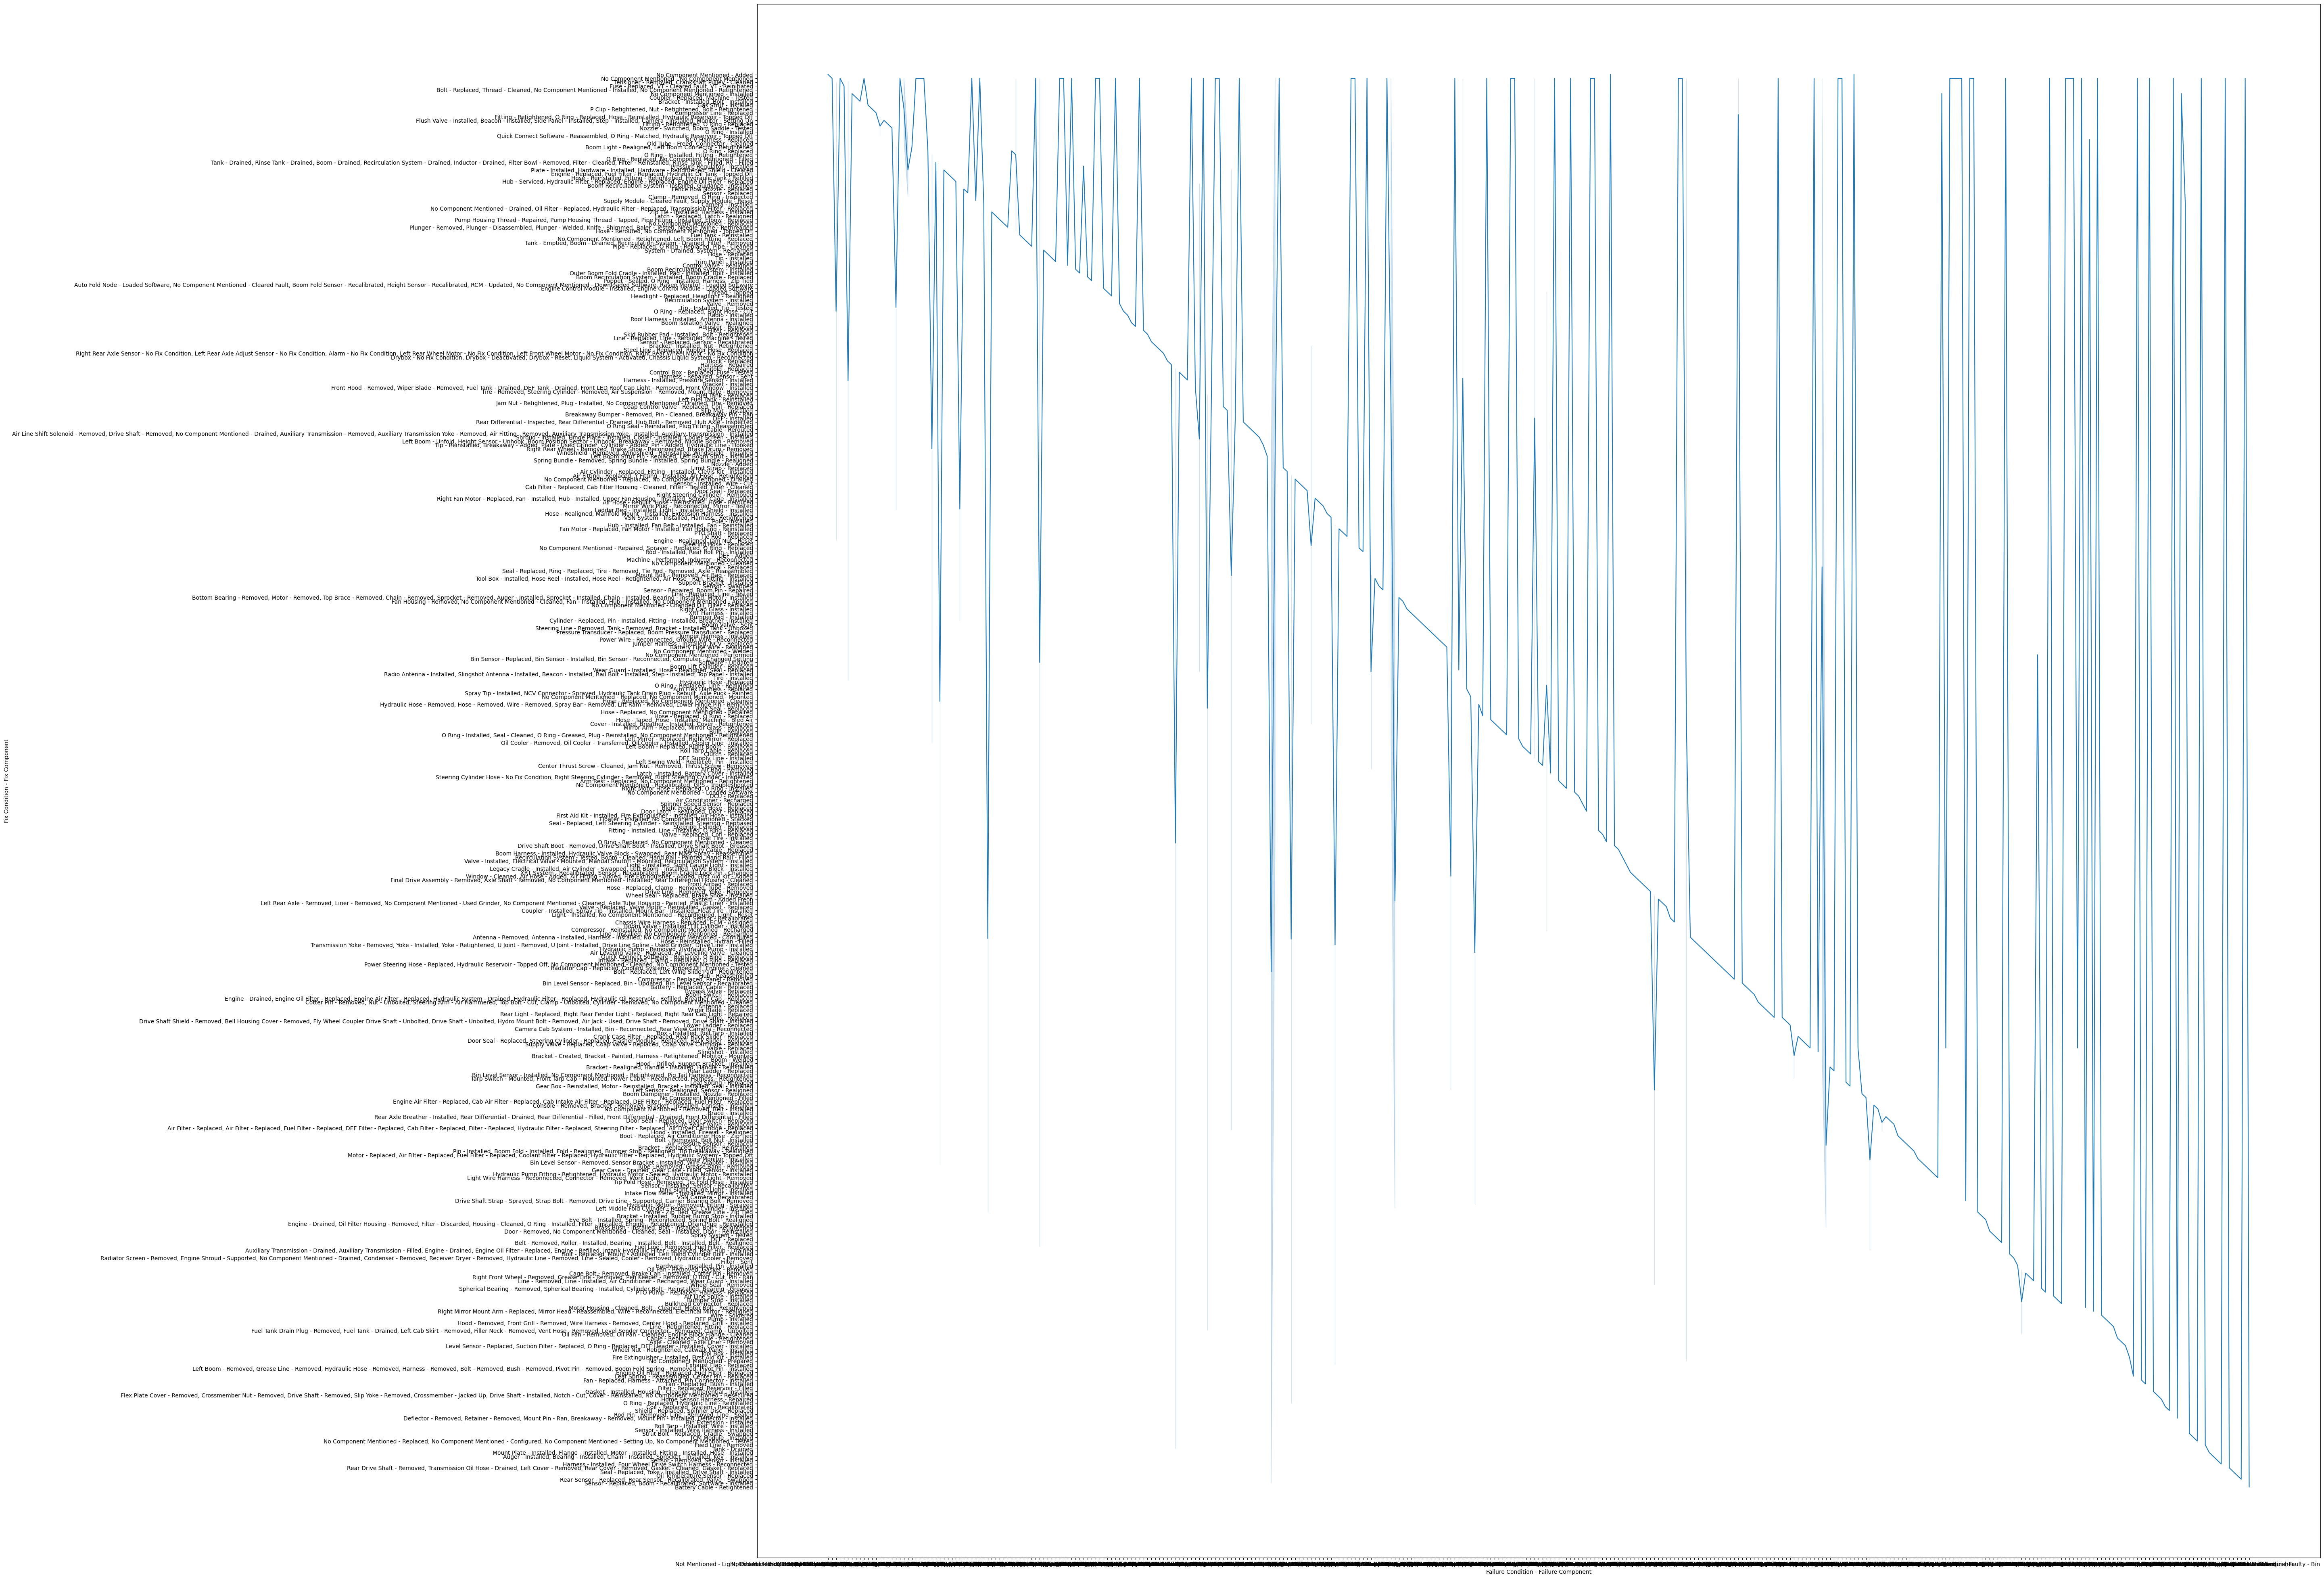

In [63]:
plt.figure(figsize=(50,50))
sns.lineplot(x='Failure Condition - Failure Component',y='Fix Condition - Fix Component',data=merged_df)


#Root Cause Identification – Observations

Long-Tail Effect of Failures

A small set of components accounts for the majority of failures.

The chart shows a steep drop from the top components, then a long tail of rarely failing parts.

This suggests focusing on the top recurring components could yield the biggest reliability improvements.

Top Failure/ Fix Concentration

The first ~10–15 components dominate the issue counts, while most other components contribute marginally.

This indicates that resource prioritization on these critical few will provide the maximum impact.

High Variability

The line plot reveals sharp drops and spikes across components.

This implies some failures are systematic (frequent, repeatable), while others are sporadic and may result from isolated conditions.

Improvement Opportunity

Since the same few components repeatedly fail, corrective design, supplier quality checks, or preventive maintenance for these components could significantly reduce downtime and cost.

#Stakeholder Message

80/20 Rule in Action: About 20% of the components are responsible for ~80% of the failures.

Strategic Focus: Addressing root causes in this small group will deliver the greatest improvement in reliability and cost reduction.

Next Steps: Investigate design weaknesses, material quality, or usage conditions for the top recurring failed components, and ensure fix methods are addressing the root issue, not just applying temporary solutions.

In [64]:
#Submit the cleaned and merged dataset in csv/excel format.
merged_df.to_csv('merged_data.csv', index=False)
